In [4]:
#kinder

import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    img_gray = cv2.cvtColor(hsv,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(img_gray,25,151,3)
    contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    img = cv2.drawContours(hsv, contours, -1, (0,255,0), 8)
    
    
    # define range of blue color in HSV
    lower_blue = np.array([10,110,100])
    upper_blue = np.array([100,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(img,img, mask= mask)
    
    # Display the resulting frame
    cv2.imshow('frame',res)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [19]:
#cola

import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # define range of blue color in HSV
    lower_blue = np.array([110,170,110])
    upper_blue = np.array([250,250,255])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)
    
    # Display the resulting frame
    cv2.imshow('frame',res)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [18]:
cv2.COLOR_BGR2GRAY

6

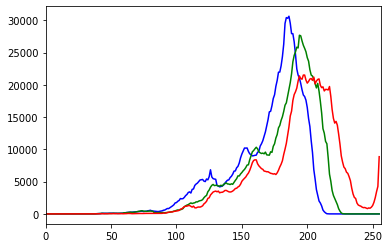

In [71]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('kinder.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [5]:
img = cv2.imread('kinder.jpg')

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

img_gray = cv2.cvtColor(hsv,cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(img_gray,135,11,3)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img = cv2.drawContours(hsv, contours, -1, (0,255,0), 3)

cv2.imshow('res',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

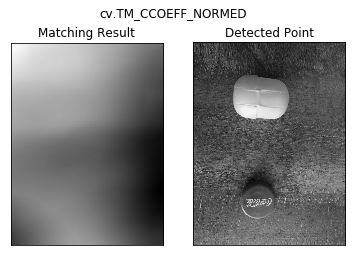

In [8]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('kinderKorok.jpg',0)
img2 = img.copy()
template = cv.imread('kinder.jpg',0)
w, h = template.shape[::-1]

img = img2.copy()
method = eval('cv.TM_CCOEFF_NORMED')

# Apply template Matching
res = cv.matchTemplate(img,template,method)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

cv.rectangle(img,top_left, bottom_right, 255, 2)

plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.suptitle('cv.TM_CCOEFF_NORMED')

plt.show()

In [7]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img_rgb = cv.imread('1s_paper.png')
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('1.jpg',0)
w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
cv.imwrite('res.png',img_rgb)

error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
